# Elección de monedas

Como quedó aclarado en el primer notebook, vamos a explorar y seleccionar 5 Payment Cryptos y 5 Privacy Cryptos.

In [1]:
import pandas as pd
import datetime as dt
import time as t
from pycoingecko import CoinGeckoAPI
import seaborn as sns
import matplotlib.pyplot as plt

Conectamos con la API de CoinGecko y confirmamos conexión.

In [2]:
cg = CoinGeckoAPI()

cg.ping()

{'gecko_says': '(V3) To the Moon!'}

Buscamos las categorías Payment y Privacy.

In [11]:
coin_categories = pd.DataFrame(cg.get_coins_categories_list())

coin_categories.head(3)

,category_id,name
0,aave-tokens,Aave Tokens
1,algorand-ecosystem,Algorand Ecosystem
2,alleged-sec-securities,Alleged SEC Securities


In [12]:
coin_categories[coin_categories['category_id'].str.contains('privacy')]

,category_id,name
153,privacy-coins,Privacy Coins


In [13]:
coin_categories[coin_categories['category_id'].str.contains('payment')]

,category_id,name
146,payment-solutions,Payment Solutions


Ya encontramos las categorías que queríamos, ahora vamos a buscar información para elegir 5 de ellas.

In [25]:
privacy_data_by_m_cap = pd.DataFrame(cg.get_coins_markets(vs_currency = 'usd', category = 'privacy-coins')).sort_values('market_cap', ascending=False)
privacy_data_by_m_cap = privacy_data_by_m_cap[['name', 'current_price', 'market_cap', 'circulating_supply']]
payment_data_by_m_cap = pd.DataFrame(cg.get_coins_markets(vs_currency = 'usd', category = 'payment-solutions')).sort_values('market_cap', ascending=False)
payment_data_by_m_cap = payment_data_by_m_cap[['name', 'current_price', 'market_cap', 'circulating_supply']]
privacy_data_by_m_cap.head(3)

,name,current_price,market_cap,circulating_supply
0,Monero,158.67,2.878199e+09,1.814782e+07
1,Dash,32.04,3.657702e+08,1.140816e+07
2,Mask Network,3.46,2.836513e+08,8.211250e+07


##### Market Cap (Capitalización de Mercado):

Es una de las variables mas importantes a tener evaluar, ya que es el valor total de todas las unidades de la criptomoneda en circulación multiplicado por su precio actual. Es una medida de la dimensión económica de la criptomoneda.

Por lo que vamos a seleccionar las 5 mejor capitalizadas para hacer nuestro análisis.

In [26]:
privacy_df = privacy_data_by_m_cap.head(5)
display(privacy_df)

payment_df = payment_data_by_m_cap.head(5)
display(payment_df)

,name,current_price,market_cap,circulating_supply
0,Monero,158.67,2.878199e+09,1.814782e+07
1,Dash,32.04,3.657702e+08,1.140816e+07
2,Mask Network,3.46,2.836513e+08,8.211250e+07
3,Zcash,29.77,2.459884e+08,8.265870e+06
4,Decred,14.70,2.263840e+08,1.540916e+07


,name,current_price,market_cap,circulating_supply
0,Alchemy Pay,1.733893e-02,85630973.0,4.943691e+09
1,Utrust,6.753700e-02,31725797.0,4.700000e+08
2,Tap,5.616630e-03,21213758.0,3.777482e+09
3,DePay,1.904850e-01,1268202.0,6.658594e+06
4,CATpay,1.355800e-11,298988.0,2.205242e+16


Estas son las 10 monedas que vamos a seleccionar para hacer nuestro análisis.

In [46]:
privacy_list = privacy_df.name.tolist()
print(f"Privacy: {privacy_list}")

payment_list = payment_df.name.tolist()
print(f"Payment: {payment_list}")

Privacy: ['Monero', 'Dash', 'Mask Network', 'Zcash', 'Decred']
Payment: ['Alchemy Pay', 'Utrust', 'Tap', 'DePay', 'CATpay']


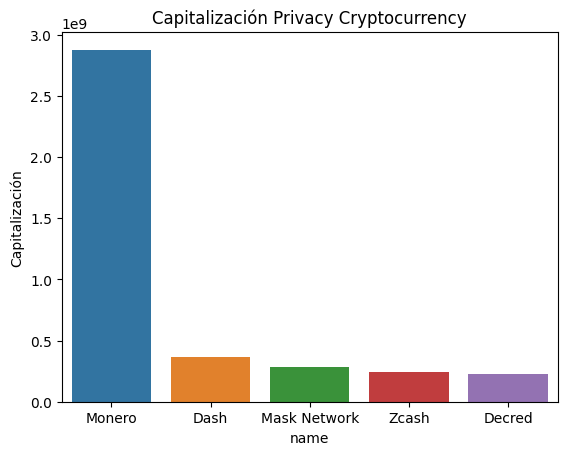

In [47]:
sns.barplot(x = 'name', y = 'market_cap', data = privacy_df)
plt.title("Capitalización Privacy Cryptocurrency")
plt.ylabel("Capitalización")
plt.show()

In [48]:
privacy_df.columns

Index(['name', 'current_price', 'market_cap', 'circulating_supply'], dtype='object')

In [58]:
# Vamos a comparar la capitalización de las monedas elegidas con el resto.
resto_privacy = privacy_data_by_m_cap[['name', 'market_cap']][~(privacy_data_by_m_cap['name'].isin(privacy_list))] # el "~" transforma al is-in en un not-in

privacy_con_resto = privacy_df[['name', 'market_cap']]

privacy_con_resto.loc[len(privacy_con_resto.index)] = ['Resto', resto_privacy['market_cap'].sum()]

C:\Users\cristian_torres\AppData\Local\Temp\ipykernel_10572\3995055657.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  privacy_con_resto.loc[len(privacy_con_resto.index)] = ['Resto', resto_privacy['market_cap'].sum()]


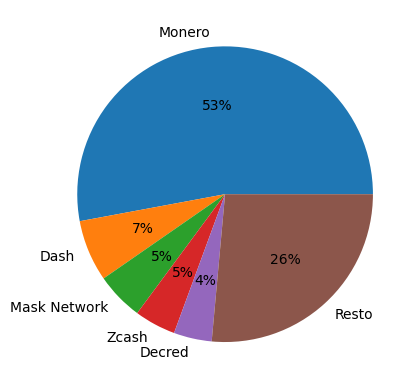

In [65]:
plt.pie(privacy_con_resto.market_cap, labels=privacy_con_resto.name, autopct='%.0f%%')

plt.show()

<Axes: xlabel='Date'>

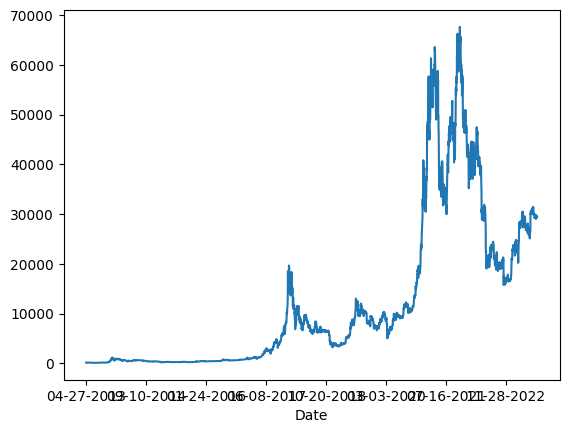

In [4]:
daily_historical = cg.get_coin_market_chart_by_id(id = 'bitcoin', vs_currency = 'usd', days = 'max')

daily_historical_data_frame = pd.DataFrame(data = daily_historical['prices'], columns = ['Date', 'Price'])

daily_historical_data_frame['Date'] = daily_historical_data_frame['Date'].apply(lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%m-%d-%Y'))

daily_historical_data_frame = daily_historical_data_frame.set_index('Date')

daily_historical_data_frame['Price'].plot()

In [ ]:
#dailyHistoricalDataFrame = pd.DataFrame(data = dailyHistoricalData['prices'], columns = ['Date', 'Price'])

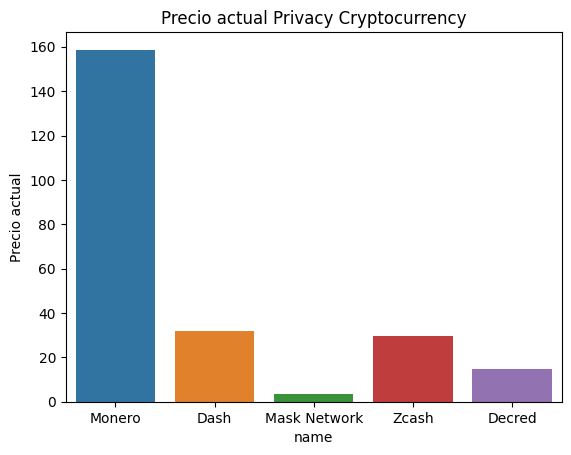

In [50]:
sns.barplot(x = 'name', y = 'current_price', data = privacy_df)
plt.title("Precio actual Privacy Cryptocurrency")
plt.ylabel("Precio actual")
plt.show()

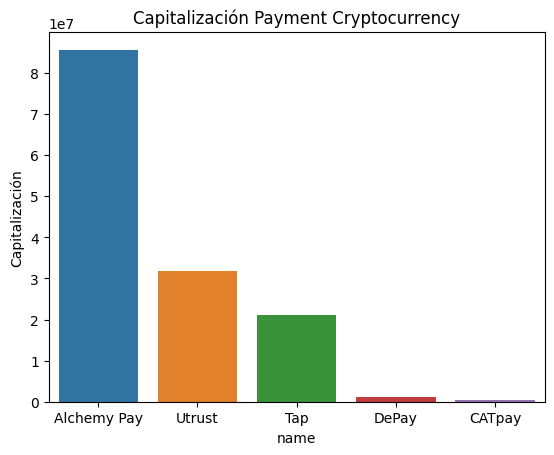

In [51]:
sns.barplot(x = 'name', y = 'market_cap', data = payment_df)
plt.title("Capitalización Payment Cryptocurrency")
plt.ylabel("Capitalización")
plt.show()

In [57]:
resto_payment = payment_data_by_m_cap[['name', 'market_cap']][~(payment_data_by_m_cap['name'].isin(payment_list))]
payment_con_resto = payment_df[['name', 'market_cap']]

payment_con_resto.loc[len(payment_con_resto.index)] = ['Resto', resto_payment['market_cap'].sum()]

C:\Users\cristian_torres\AppData\Local\Temp\ipykernel_10572\2929796598.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payment_con_resto.loc[len(payment_con_resto.index)] = ['Resto', resto_payment['market_cap'].sum()]


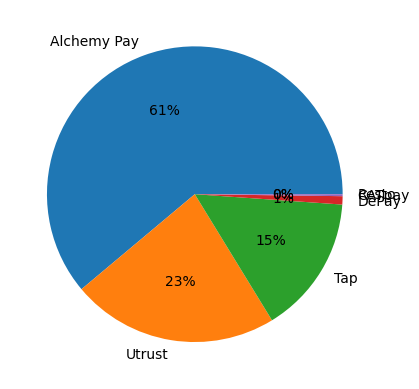

In [69]:
plt.pie(payment_con_resto.market_cap, labels=payment_con_resto.name, autopct='%.0f%%')


plt.show()

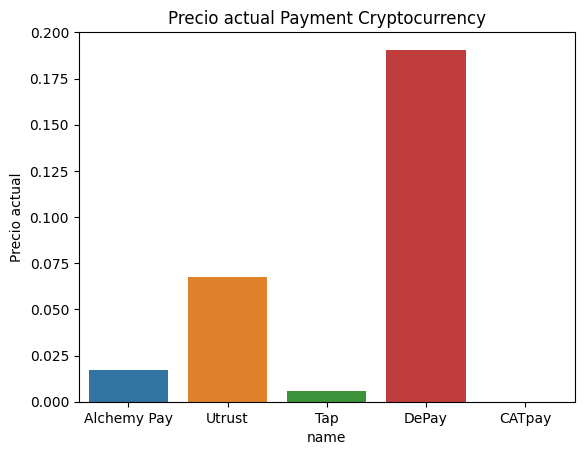

In [20]:
sns.barplot(x = 'name', y = 'current_price', data = payment_df)
plt.title("Precio actual Payment Cryptocurrency")
plt.ylabel("Precio actual")
plt.show()